# Predicting Customer Churn: Empowering Syriatel to Optimize Retention and Loyalty Utilizing Data-Driven Insights

# 1. Background Information

# About Syriatel
* Syriatel has been one of Syria's leading telecommunications companies since its establishment in 2000, primarily offering mobile network services. The company places a strong emphasis on customer satisfaction and social responsibility. Syriatel provides a wide range of telecom services, including mobile voice, data services, mobile internet, and value-added services.


* Syriatel has established a robust network infrastructure with 24 points of service that cover the entire Syrian territory. The company operates four call centers in key cities—Damascus, Aleppo, Lattakia, and Tartous—serving over 23,000 customer queries daily. Additionally, Syriatel maintains 199 international roaming partnerships across 116 countries, ensuring global connectivity for its users.


* With a focus on providing the best mobile communications experience, Syriatel aims to empower its customers, enhance employee satisfaction, and achieve sustained value creation for its shareholders. Despite challenges posed by the ongoing conflict, the company continues to play a vital role in Syria’s telecommunications landscape.

# 2. Problem Statement

*	Customer churn occurs when someone stops purchasing your products and or your services. This is a significant challenge for telecommunications companies, and Syriatel is no exception. As a leading telecom provider in Syria, Syriatel is keen to understand the factors influencing customer retention to reduce revenue loss and improve customer loyalty. The goal of this project is to build a machine learning classifier that predicts whether a customer is likely to churn (i.e., stop doing business with Syriatel) soon.
*	By identifying customers at risk of leaving, Syriatel can implement targeted retention strategies and improve its customer experience. This binary classification problem will analyse historical customer data to uncover patterns and trends associated with churn. The aim is to provide actionable insights into Syriatel’s business operations, enabling them to reduce churn, enhance customer satisfaction, and optimize marketing and service strategies.
*	What predictable patterns in customer behaviours can Syriatel use to identify potential churn, and how can it leverage this information to improve customer retention?


# 3. Objectives

#### a. Churn Prediction Insights:
* Provide notable insights from prediction the model to help SyriaTel identify customer groups that have the highest likelihood   of churning.
* Recognize critical factors contributing to churn to inform retention strategies.

#### b. Model Evaluation and Comparison:
* Assess the models using performance metrics such as accuracy, precision, recall, F1-score, ROC AUC, and confusion matrix.
* Compare the models to determine which one provides the most reliable churn predictions.

#### c. Recommendations for Customer Retention:
* Using insights from the model, recommend strategies to minimize churns, such as targeted marketing, exclusive offers, or         enhanced customer support.
* Propose a strategy for ongoing churn prediction and retention efforts to help SyriaTel continuously improve customer loyalty.

# 4. Metric For Success

The success will be determined by the model's accuracy in predicting churn, its impact on customer retention, and its influence on Syriatel's revenue and customer satisfaction. 
##### a. Model Accuracy Metrics
* Accuracy: The percentage of times the model correctly predicts whether a customer is likely to churn or not.
* Precision: The proportion of customers predicted to churn who do churn.
* Recall: How many of the actual churners were correctly identified by the model.
* F1-Score: A combined measure of precision and recall, ensuring both are balanced and perform well. 
* AUC-ROC: The model's ability to differentiate between customers who will churn and those who won’t.


# 5. Data Understanding

###### Source of data
* The data being used for this analysis is extracted from the following Kaggle.com link : https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset

###### Import libraries

In [1]:
# Import libraries for data understanding, cleaning and analysis
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.datasets import load_iris
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

# Suppress warnings
warnings.filterwarnings("ignore", category=FutureWarning)


##### Data  loading , review , encoding and analysis of the descriptive statistics

In [2]:
# Loading data
data_df = pd.read_csv(r'C:\Users\deetu\Documents\Moringa_course\Phase_3\Phase_3_Project\Telecom_dataset\bigml_59c28831336c6604c800002a.csv', encoding='Latin1', low_memory=False)
data_df.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [3]:
# check the columns
data_df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [4]:
# check shape
data_df.shape

(3333, 21)

In [5]:
# rename multiple columns in a list for clarity
data_df = data_df.rename(columns = {'number vmail messages':'number voice mail messages', 'total eve minutes':'total evening minutes', 'total eve calls':'total evening calls', 'total eve charge':'total evening charge', 'total intl minutes':'total international minutes', 'total intl calls':'total international calls', 'total intl charge':'total internationall charge'})
                

In [6]:
#check first 10 rows
data_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number voice mail messages,total day minutes,total day calls,total day charge,...,total evening calls,total evening charge,total night minutes,total night calls,total night charge,total international minutes,total international calls,total internationall charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
#check null values
data_df.isnull().any()

state                          False
account length                 False
area code                      False
phone number                   False
international plan             False
voice mail plan                False
number voice mail messages     False
total day minutes              False
total day calls                False
total day charge               False
total evening minutes          False
total evening calls            False
total evening charge           False
total night minutes            False
total night calls              False
total night charge             False
total international minutes    False
total international calls      False
total internationall charge    False
customer service calls         False
churn                          False
dtype: bool

In [8]:
# Check duplicates
data_df.duplicated().value_counts()

False    3333
Name: count, dtype: int64

In [9]:
# Check data summary
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state                        3333 non-null   object 
 1   account length               3333 non-null   int64  
 2   area code                    3333 non-null   int64  
 3   phone number                 3333 non-null   object 
 4   international plan           3333 non-null   object 
 5   voice mail plan              3333 non-null   object 
 6   number voice mail messages   3333 non-null   int64  
 7   total day minutes            3333 non-null   float64
 8   total day calls              3333 non-null   int64  
 9   total day charge             3333 non-null   float64
 10  total evening minutes        3333 non-null   float64
 11  total evening calls          3333 non-null   int64  
 12  total evening charge         3333 non-null   float64
 13  total night minute

In [10]:
#Check statistical descriptions
data_df.describe()

,account length,area code,number voice mail messages,total day minutes,total day calls,total day charge,total evening minutes,total evening calls,total evening charge,total night minutes,total night calls,total night charge,total international minutes,total international calls,total internationall charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [11]:
# Dropping the columns we dont need 'phone number'and 'area code'
# phone number is unique to each person so we cannot use the information predict
# As state is more detailed we dont need the area code details
drop_data = data_df[['phone number', 'state']]
data_df = data_df.drop(columns=drop_data)
data_df

,account length,area code,international plan,voice mail plan,number voice mail messages,total day minutes,total day calls,total day charge,total evening minutes,total evening calls,total evening charge,total night minutes,total night calls,total night charge,total international minutes,total international calls,total internationall charge,customer service calls,churn
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [12]:
#checking for the data summary
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   account length               3333 non-null   int64  
 1   area code                    3333 non-null   int64  
 2   international plan           3333 non-null   object 
 3   voice mail plan              3333 non-null   object 
 4   number voice mail messages   3333 non-null   int64  
 5   total day minutes            3333 non-null   float64
 6   total day calls              3333 non-null   int64  
 7   total day charge             3333 non-null   float64
 8   total evening minutes        3333 non-null   float64
 9   total evening calls          3333 non-null   int64  
 10  total evening charge         3333 non-null   float64
 11  total night minutes          3333 non-null   float64
 12  total night calls            3333 non-null   int64  
 13  total night charge

In [13]:
#Adding new columns for trend analysis in the original data
# Create a new feature in the original data for : Total charges (sum of day, evening, and night charges)
data_df['total charges'] = data_df['total day charge'] + data_df['total evening charge'] + data_df['total night charge']
data_df['total charges']

0       72.86
1       55.54
2       59.00
3       65.02
4       49.36
        ...  
3328    57.43
3329    60.94
3330    63.93
3331    56.18
3332    73.31
Name: total charges, Length: 3333, dtype: float64

In [14]:
#Adding new columns for trend analysis 
# Create a new feature: Total calls (sum of day, evening, and night calls)
data_df['total calls'] = data_df['total day calls'] + data_df['total evening calls'] + data_df['total night calls']
data_df['total calls']

0       300
1       329
2       328
3       248
4       356
       ... 
3328    286
3329    235
3330    258
3331    326
3332    272
Name: total calls, Length: 3333, dtype: int64

In [15]:
#Adding new columns for trend analysis 
# Create a new feature: Total minutes (sum of day, evening, and night minutes)
data_df['total minutes'] = data_df['total day minutes'] + data_df['total evening minutes'] + data_df['total night minutes']
data_df['total minutes']

0       707.2
1       611.5
2       527.2
3       558.2
4       501.9
        ...  
3328    650.8
3329    575.8
3330    661.5
3331    512.6
3332    741.7
Name: total minutes, Length: 3333, dtype: float64

In [16]:
# Adding new columns for trend analysis 
# Add a new column 'monthly_charge' by summing up the relevant charge columns
data_df['monthly_charge'] = data_df['total charges'] + data_df['total internationall charge']
data_df['monthly_charge']

0       75.56
1       59.24
2       62.29
3       66.80
4       52.09
        ...  
3328    60.10
3329    63.53
3330    67.74
3331    57.53
3332    77.01
Name: monthly_charge, Length: 3333, dtype: float64

In [17]:
# Create a new copy of data_df and perform encoding
third_data_df = data_df.copy()
third_data_df

,account length,area code,international plan,voice mail plan,number voice mail messages,total day minutes,total day calls,total day charge,total evening minutes,total evening calls,...,total night charge,total international minutes,total international calls,total internationall charge,customer service calls,churn,total charges,total calls,total minutes,monthly_charge
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,...,11.01,10.0,3,2.70,1,False,72.86,300,707.2,75.56
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,...,11.45,13.7,3,3.70,1,False,55.54,329,611.5,59.24
2,137,415,no,no,0,243.4,114,41.38,121.2,110,...,7.32,12.2,5,3.29,0,False,59.00,328,527.2,62.29
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,...,8.86,6.6,7,1.78,2,False,65.02,248,558.2,66.80
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,...,8.41,10.1,3,2.73,3,False,49.36,356,501.9,52.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,no,yes,36,156.2,77,26.55,215.5,126,...,12.56,9.9,6,2.67,2,False,57.43,286,650.8,60.10
3329,68,415,no,no,0,231.1,57,39.29,153.4,55,...,8.61,9.6,4,2.59,3,False,60.94,235,575.8,63.53
3330,28,510,no,no,0,180.8,109,30.74,288.8,58,...,8.64,14.1,6,3.81,2,False,63.93,258,661.5,67.74
3331,184,510,yes,no,0,213.8,105,36.35,159.6,84,...,6.26,5.0,10,1.35,2,False,56.18,326,512.6,57.53


In [18]:
#check columns
third_data_df.columns

Index(['account length', 'area code', 'international plan', 'voice mail plan',
       'number voice mail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total evening minutes', 'total evening calls',
       'total evening charge', 'total night minutes', 'total night calls',
       'total night charge', 'total international minutes',
       'total international calls', 'total internationall charge',
       'customer service calls', 'churn', 'total charges', 'total calls',
       'total minutes', 'monthly_charge'],
      dtype='object')

In [19]:
#Covert 'churn' column which is boolean to be in 0 and 1 
# false = 0 , true = 1 
third_data_df['churn'] = third_data_df['churn'].astype(int)
third_data_df['churn']

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int32

In [20]:
# check the unique values in the following categorical predictors 'international plan',
# ,'voice mail plan','churn', 'Region'
print (third_data_df['international plan'].unique())
print (third_data_df['voice mail plan'].unique())
print (third_data_df['area code'].unique())

['no' 'yes']
['yes' 'no']
[415 408 510]


In [21]:
# encoding categorical data
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

data_encode2 = third_data_df[['area code', 'international plan', 'voice mail plan']]
encode2 = OneHotEncoder(drop='first')
encode_cat_data2 = encode2.fit_transform(data_encode2)
encode_cat_data2 = encode_cat_data2.toarray()
encoded_columns2 = encode2.get_feature_names_out(input_features=data_encode2.columns)
encod_cat_df2 = pd.DataFrame(encode_cat_data2, columns=encoded_columns2)
print(encod_cat_df2.head())

   area code_415  area code_510  international plan_yes  voice mail plan_yes
0            1.0            0.0                     0.0                  1.0
1            1.0            0.0                     0.0                  1.0
2            1.0            0.0                     0.0                  0.0
3            0.0            0.0                     1.0                  0.0
4            1.0            0.0                     1.0                  0.0


In [22]:
# Creating a final new data set
data_not_encoded2 =third_data_df.drop(columns=['area code', 'international plan', 'voice mail plan'])
final2_data_df = pd.concat([data_not_encoded2,encod_cat_df2],axis =1)
final2_data_df

,account length,number voice mail messages,total day minutes,total day calls,total day charge,total evening minutes,total evening calls,total evening charge,total night minutes,total night calls,...,customer service calls,churn,total charges,total calls,total minutes,monthly_charge,area code_415,area code_510,international plan_yes,voice mail plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,1,0,72.86,300,707.2,75.56,1.0,0.0,0.0,1.0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,1,0,55.54,329,611.5,59.24,1.0,0.0,0.0,1.0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,59.00,328,527.2,62.29,1.0,0.0,0.0,0.0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,2,0,65.02,248,558.2,66.80,0.0,0.0,1.0,0.0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,3,0,49.36,356,501.9,52.09,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,...,2,0,57.43,286,650.8,60.10,1.0,0.0,0.0,1.0
3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,...,3,0,60.94,235,575.8,63.53,1.0,0.0,0.0,0.0
3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,...,2,0,63.93,258,661.5,67.74,0.0,1.0,0.0,0.0
3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,...,2,0,56.18,326,512.6,57.53,0.0,1.0,1.0,0.0


In [23]:
# Drop the following columns:  Use the total versions of the data instead

irrelevant_columns = ['total day minutes','total day calls', 'total day charge', 'total evening minutes',
       'total evening calls', 'total evening charge', 'total night minutes',
       'total night calls', 'total night charge',
       'total international minutes', 'total international calls',
       'total internationall charge' ]
final2_data_df= final2_data_df.drop(columns = irrelevant_columns)
final2_data_df

,account length,number voice mail messages,customer service calls,churn,total charges,total calls,total minutes,monthly_charge,area code_415,area code_510,international plan_yes,voice mail plan_yes
0,128,25,1,0,72.86,300,707.2,75.56,1.0,0.0,0.0,1.0
1,107,26,1,0,55.54,329,611.5,59.24,1.0,0.0,0.0,1.0
2,137,0,0,0,59.00,328,527.2,62.29,1.0,0.0,0.0,0.0
3,84,0,2,0,65.02,248,558.2,66.80,0.0,0.0,1.0,0.0
4,75,0,3,0,49.36,356,501.9,52.09,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,2,0,57.43,286,650.8,60.10,1.0,0.0,0.0,1.0
3329,68,0,3,0,60.94,235,575.8,63.53,1.0,0.0,0.0,0.0
3330,28,0,2,0,63.93,258,661.5,67.74,0.0,1.0,0.0,0.0
3331,184,0,2,0,56.18,326,512.6,57.53,0.0,1.0,1.0,0.0


In [24]:
# final data for modelling set with new columns and encoding applied
final2_data_df.columns

Index(['account length', 'number voice mail messages',
       'customer service calls', 'churn', 'total charges', 'total calls',
       'total minutes', 'monthly_charge', 'area code_415', 'area code_510',
       'international plan_yes', 'voice mail plan_yes'],
      dtype='object')

In [25]:
# checking for shape
final2_data_df.shape

(3333, 12)

In [26]:
#checking data summary
final2_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   account length              3333 non-null   int64  
 1   number voice mail messages  3333 non-null   int64  
 2   customer service calls      3333 non-null   int64  
 3   churn                       3333 non-null   int32  
 4   total charges               3333 non-null   float64
 5   total calls                 3333 non-null   int64  
 6   total minutes               3333 non-null   float64
 7   monthly_charge              3333 non-null   float64
 8   area code_415               3333 non-null   float64
 9   area code_510               3333 non-null   float64
 10  international plan_yes      3333 non-null   float64
 11  voice mail plan_yes         3333 non-null   float64
dtypes: float64(7), int32(1), int64(4)
memory usage: 299.6 KB


In [27]:
# Data set used for analysis and visualizations
data_df.head()


,account length,area code,international plan,voice mail plan,number voice mail messages,total day minutes,total day calls,total day charge,total evening minutes,total evening calls,...,total night charge,total international minutes,total international calls,total internationall charge,customer service calls,churn,total charges,total calls,total minutes,monthly_charge
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,...,11.01,10.0,3,2.70,1,False,72.86,300,707.2,75.56
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,...,11.45,13.7,3,3.70,1,False,55.54,329,611.5,59.24
2,137,415,no,no,0,243.4,114,41.38,121.2,110,...,7.32,12.2,5,3.29,0,False,59.00,328,527.2,62.29
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,...,8.86,6.6,7,1.78,2,False,65.02,248,558.2,66.80
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,...,8.41,10.1,3,2.73,3,False,49.36,356,501.9,52.09


In [28]:
#checking columns
data_df.columns

Index(['account length', 'area code', 'international plan', 'voice mail plan',
       'number voice mail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total evening minutes', 'total evening calls',
       'total evening charge', 'total night minutes', 'total night calls',
       'total night charge', 'total international minutes',
       'total international calls', 'total internationall charge',
       'customer service calls', 'churn', 'total charges', 'total calls',
       'total minutes', 'monthly_charge'],
      dtype='object')

In [29]:
#checking shape
data_df.shape

(3333, 23)

# 6. Exploratory Data Analysis

###### Analysis of trends using 'data_df' . Here we look at churn vs the various continous variables . There variables are: 
* account length
* international plan
* voice mail plan
* number voice mail messages
* customer service calls
* Region

* total minutes
* total calls
* total charges
* monthly_charge

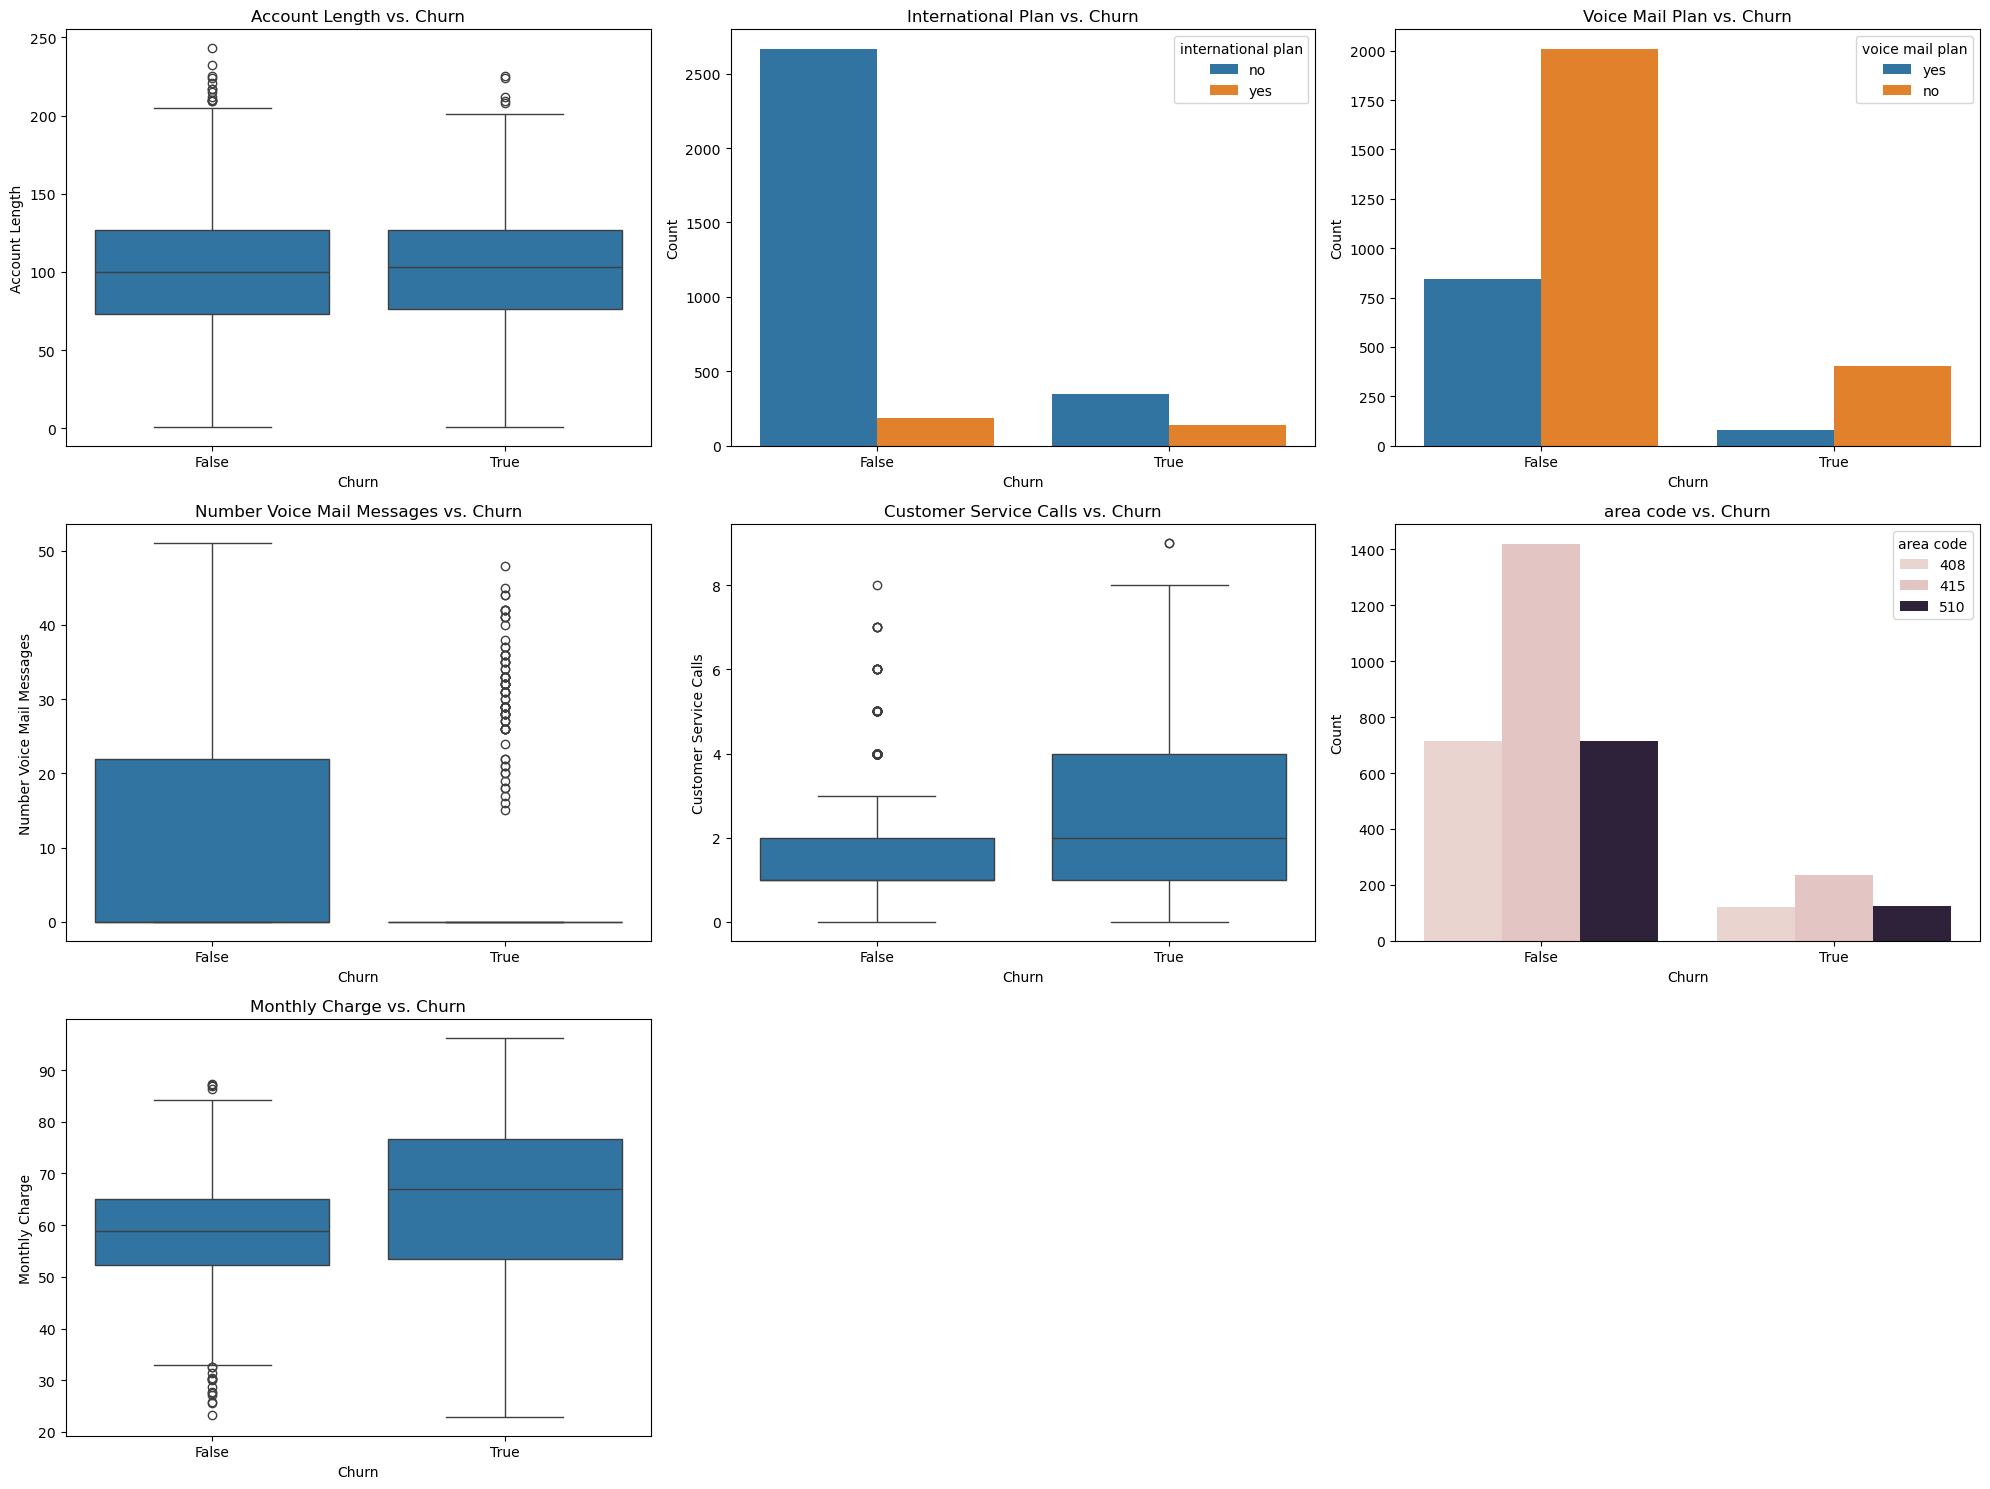

In [30]:
# Plots to analyse the relationship the predictor variables vs churn
plt.figure(figsize=(20, 15))

# Plot 1: Account Length vs Churn
plt.subplot(3, 3, 1)
sns.boxplot(x='churn', y='account length', data=data_df)
plt.title('Account Length vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Account Length')

# Plot 2: International Plan vs Churn
plt.subplot(3, 3, 2)
sns.countplot(x='churn', hue='international plan', data=data_df)
plt.title('International Plan vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Count')

# Plot 3: Voice Mail Plan vs Churn
plt.subplot(3, 3, 3)
sns.countplot(x='churn', hue='voice mail plan', data=data_df)
plt.title('Voice Mail Plan vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Count')

# Plot 4: Number Voice Mail messages vs Churn
plt.subplot(3, 3, 4)
sns.boxplot(x='churn', y='number voice mail messages', data=data_df)
plt.title('Number Voice Mail Messages vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Number Voice Mail Messages')


# Plot 5: Customer Service Calls vs Churn
plt.subplot(3, 3, 5)
sns.boxplot(x='churn', y='customer service calls', data=data_df)
plt.title('Customer Service Calls vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Customer Service Calls')

# Plot 6: Region vs Churn
plt.subplot(3, 3, 6)
sns.countplot(x='churn', hue='area code', data=data_df)
plt.title('area code vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Count')

# Plot 7: Monthly Charge vs Churn
plt.subplot(3, 3, 7)
sns.boxplot(x='churn', y='monthly_charge', data=data_df)
plt.title('Monthly Charge vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charge')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


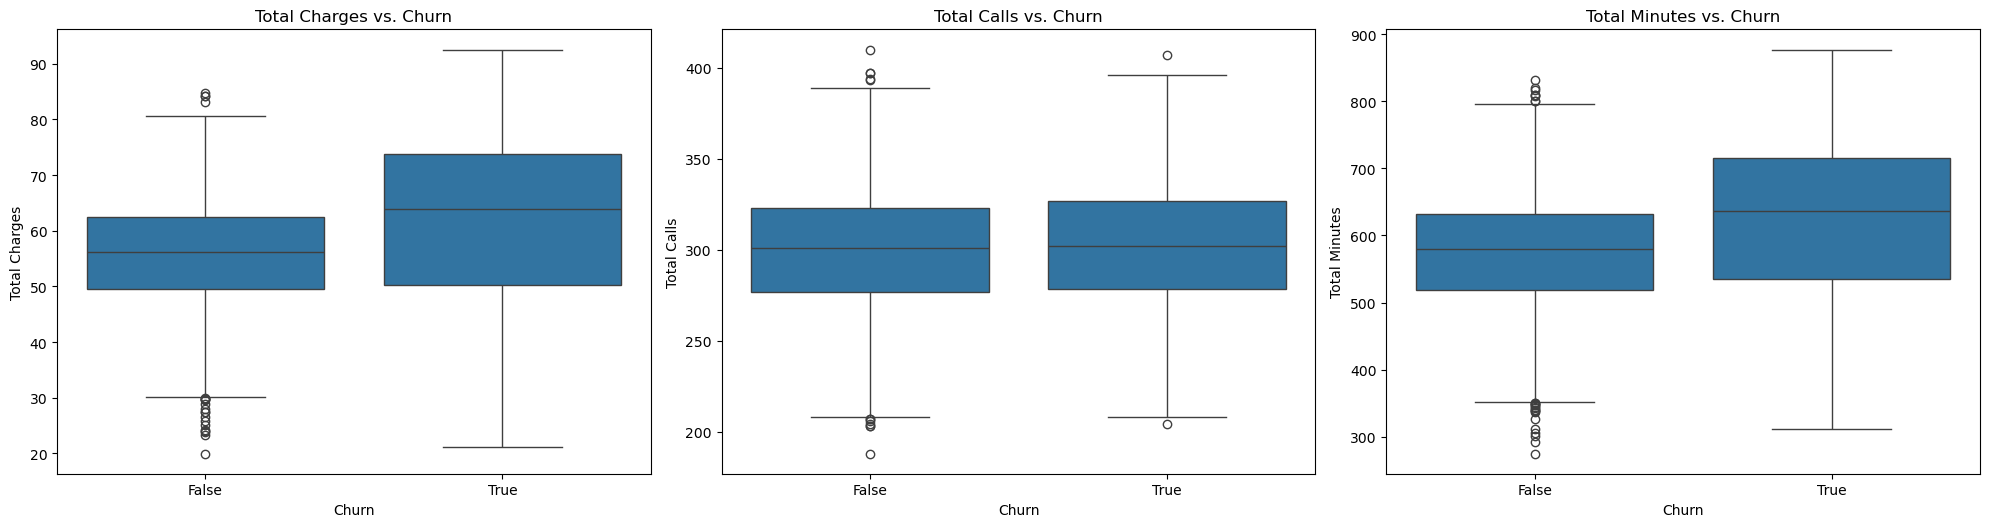

In [31]:
# Plots to analyze the relationship between the predictor variables: 'total charges', 'total calls',
# 'total minutes'vs churn

plt.figure(figsize=(20, 15))

# Plot 1: Total Charges vs Churn
plt.subplot(3, 3, 1)
sns.boxplot(x='churn', y='total charges', data=data_df)
plt.title('Total Charges vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges')

# Plot 2: Total Calls vs Churn
plt.subplot(3, 3, 2)
sns.boxplot(x='churn', y='total calls', data=data_df)
plt.title('Total Calls vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Total Calls')

# Plot 3: Total Minutes vs Churn
plt.subplot(3, 3, 3)
sns.boxplot(x='churn', y='total minutes', data=data_df)
plt.title('Total Minutes vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Total Minutes')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


Next we will use the  data set --'final2_data_df'
* As the 'data_df' dataset was used for checking the relationship that is there between the predictor variables and target         variables.
* The results seen in the above visuals to check skewness , remove outliers and check correlation on the final2_data_df

In [32]:
# As the above box plots have shown a number of outliers in the box plots we need to remove them
#using a function to remove outliers using IQR method
# Check the shape of the data before and after removing outliers

def remove_outliers(df):
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

final2_data_cleaned_df = remove_outliers(final2_data_df)

print(f"Original data shape: {final2_data_df.shape}")
print(f"Data shape after removing outliers: {final2_data_cleaned_df.shape}")


Original data shape: (3333, 12)
Data shape after removing outliers: (2053, 12)


I did not remove the outliers because they comprise over 30% of the data, meaning a significant portion would be lost.
* Effect of Removing Outliers:

When outliers are removed, the size of the dataset is significantly reduced—from 3,333 rows to just 653 rows. This can be problematic, as it may lead to the loss of valuable information, particularly if the outliers represent genuine data points reflecting real-world variations or edge cases.

* Impact on Model Performance:

Outliers can disproportionately influence the performance of certain models (e.g., linear regression, decision trees). Consequently, removing them might improve model performance. However, if the outliers are important and indicative of rare but significant patterns, their removal could diminish the predictive power of the model.

* Overfitting Risk:

Eliminating outliers may result in a model that performs well on the remaining data but fails to generalize to new or unseen data, especially if outliers occur in real-world scenarios.

In [33]:
from scipy.stats import skew

# List of numerical columns the predictor variables
# Iterate through each numerical column
# Calculate skewness for the entire column 

numerical_columns = [
    'account length', 
    'number voice mail messages', 
    'customer service calls', 
    'monthly_charge', 
    'total charges', 
    'total calls', 
    'total minutes'
]

for column in numerical_columns:
    print(f"Skewness for '{column}':")
    
    skew_value = skew(final2_data_df[column])
    
    print(f"  - Skewness: {skew_value:.2f}")
    print("-" * 50)


Skewness for 'account length':
  - Skewness: 0.10
--------------------------------------------------
Skewness for 'number voice mail messages':
  - Skewness: 1.26
--------------------------------------------------
Skewness for 'customer service calls':
  - Skewness: 1.09
--------------------------------------------------
Skewness for 'monthly_charge':
  - Skewness: -0.03
--------------------------------------------------
Skewness for 'total charges':
  - Skewness: -0.03
--------------------------------------------------
Skewness for 'total calls':
  - Skewness: -0.04
--------------------------------------------------
Skewness for 'total minutes':
  - Skewness: -0.04
--------------------------------------------------


* Nearly symmetric variables (account length, monthly charge):
   * These variables don't need any transformations, as they have very small skewness values close to 0. They are already in a       form suitable for modeling.
* Right-skewed variables (number voice mail messages, customer service calls):
   * These variables have moderate to high positive skewness, particularly number voice mail messages. You should consider applying transformations (like the log transformation) to reduce the skewness, especially if using algorithms that assume normality or are sensitive to extreme outliers (e.g., linear regression, logistic regression).

* For models like decision trees, random forests, or gradient boosting (which are less sensitive to skewed distributions), transformations may not be necessary.

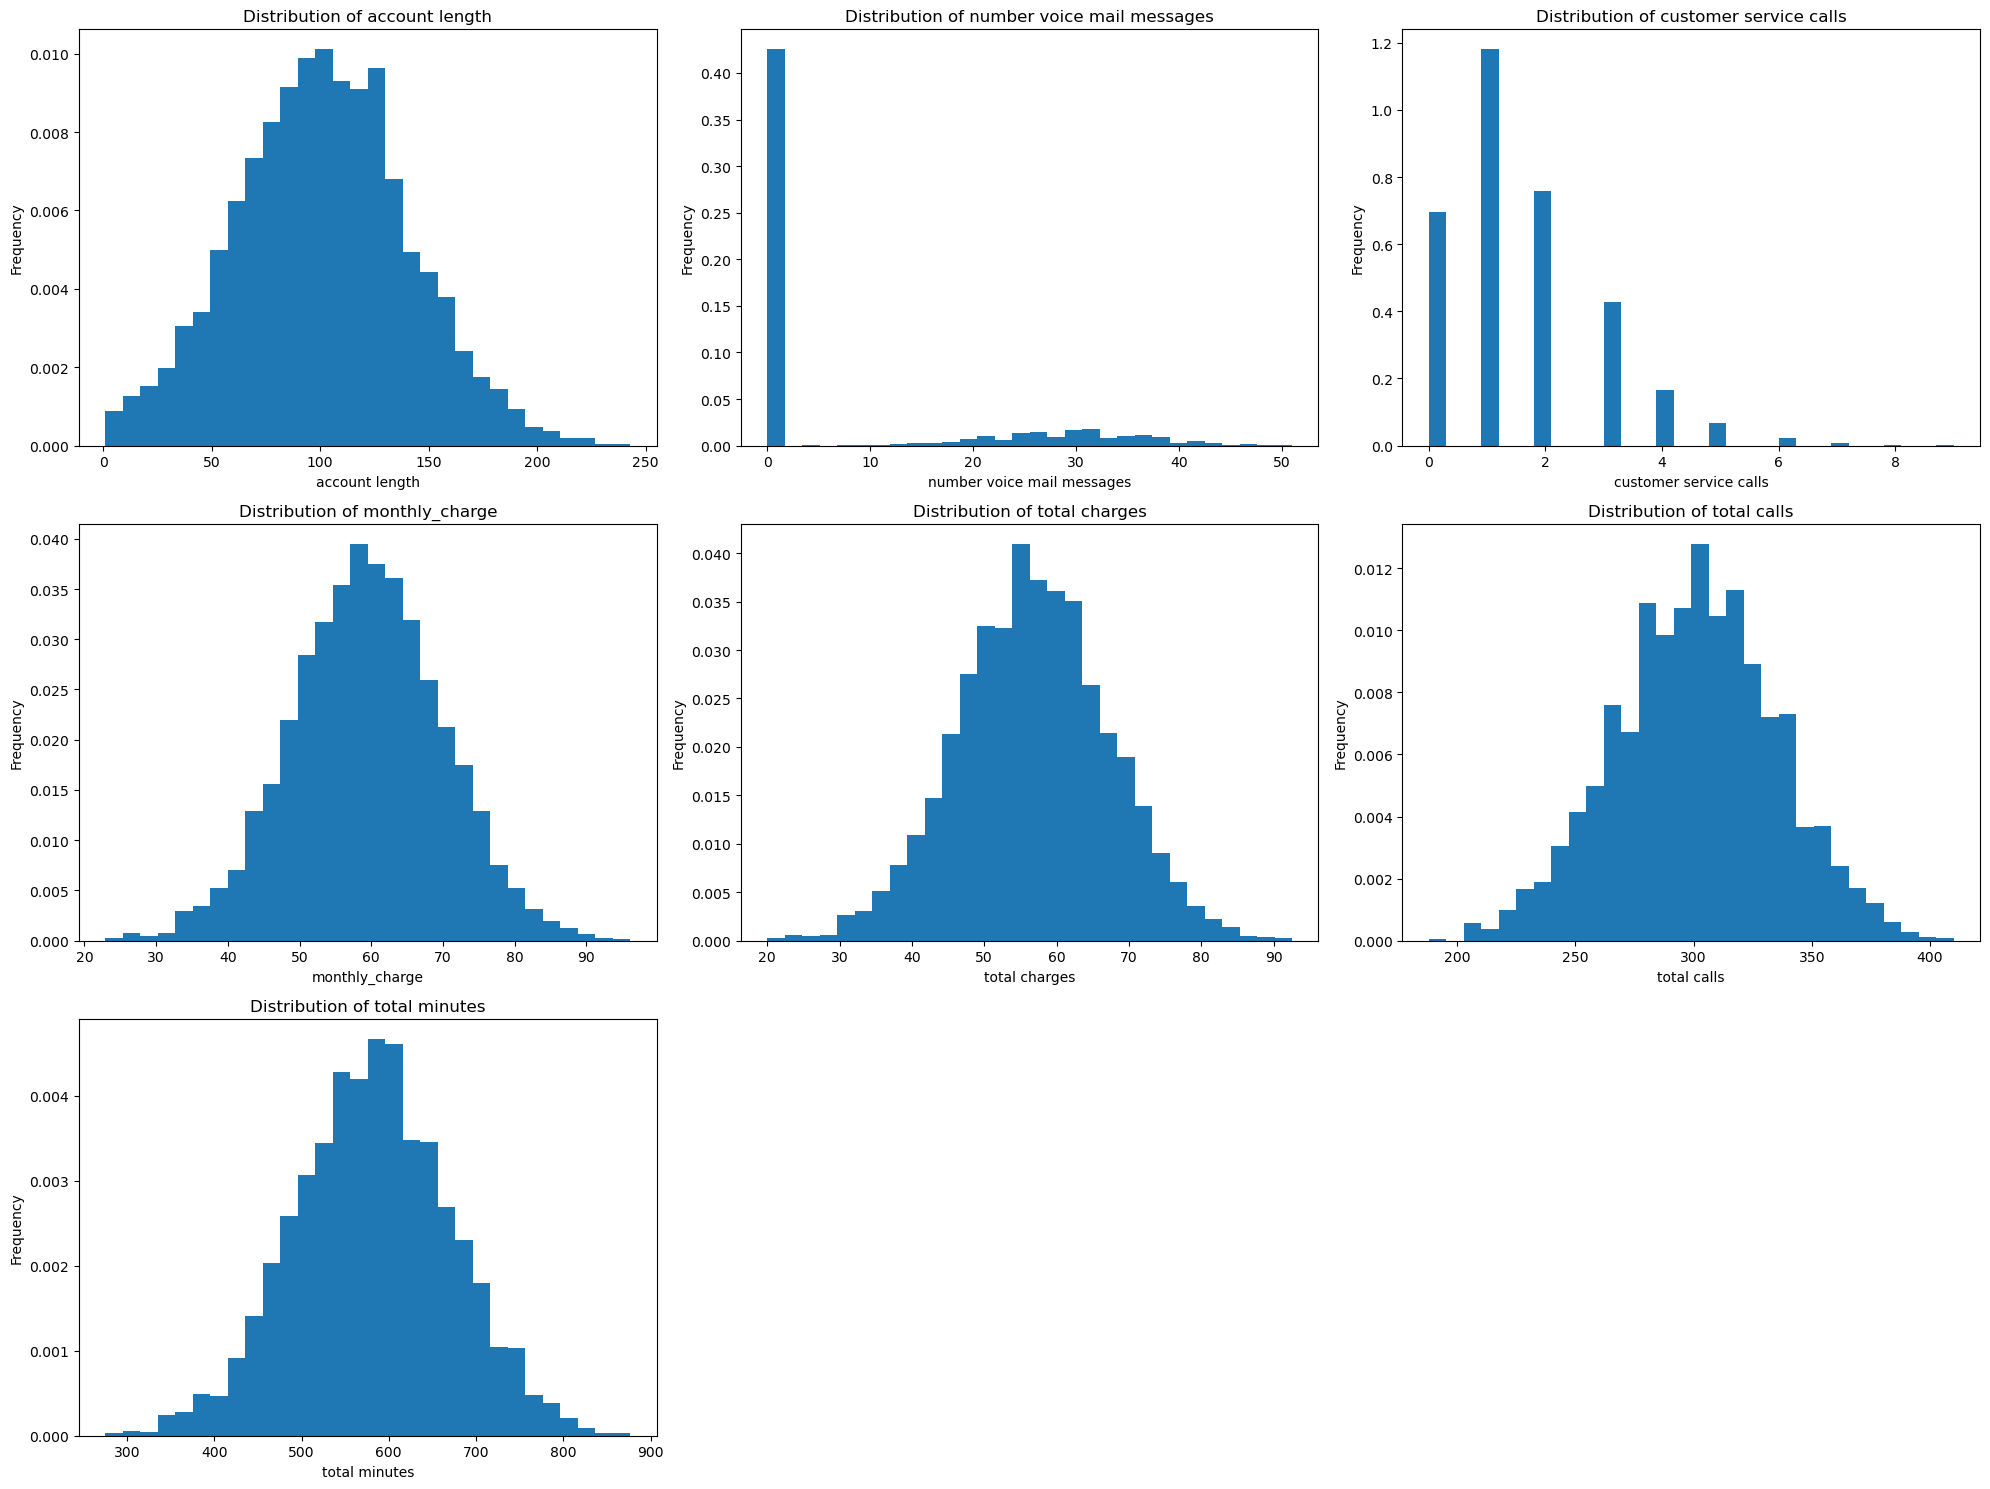

In [34]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(final2_data_df[column], bins=30, density=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

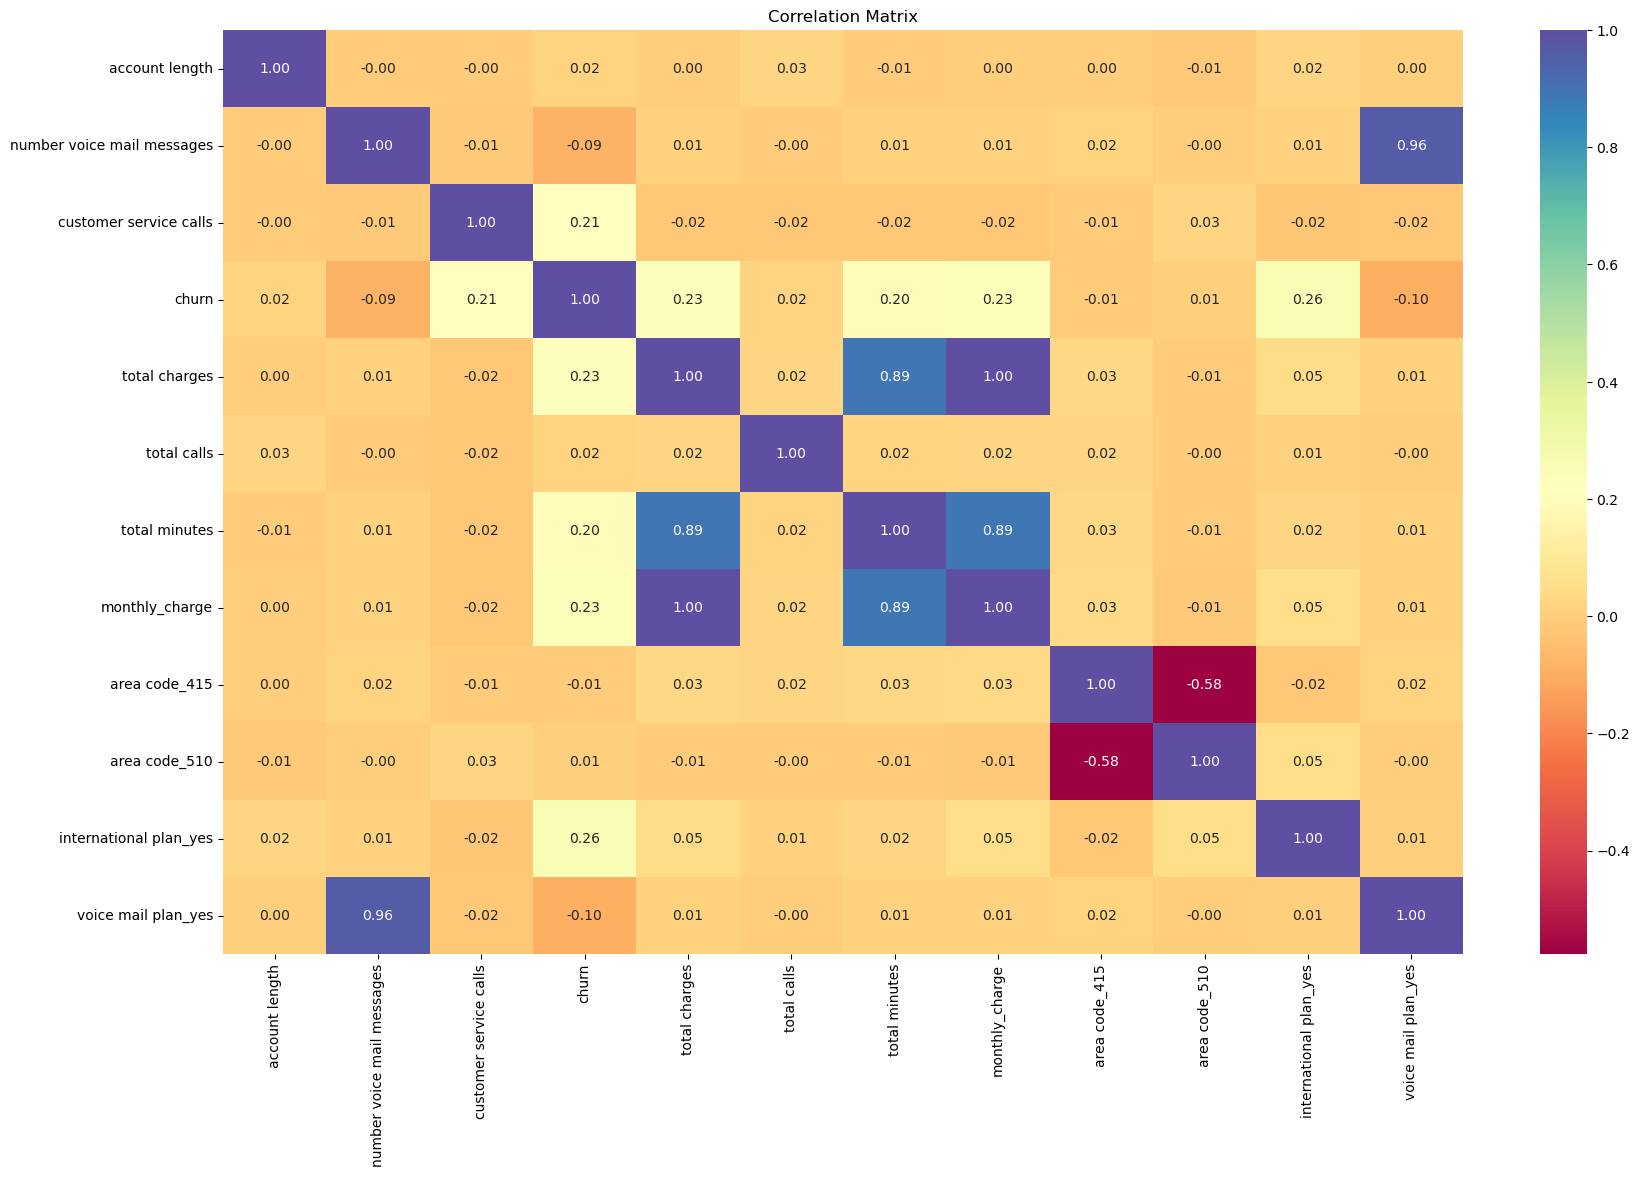

In [35]:
# data 2
# check for correlation
# Correlation heatmap
#first drop encoded or categorical data 

correlation_matrix = final2_data_df.corr()

# Create the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

From the results above we see that columns such as total charge and minutes charge are highly correlated.
Similarly voice mail plan_yes and number voice mail messages are highly correlated

# 7. Modelling and Evaluation

#### In this stage we will do the following:
* Check for multicollinearity using VIF approach for feature selection purposes
* Apply log transformation where necessary
* Apply scaling  to standardize the error for modelling
* check for and fix class imbalance
* Logistic regression
* Random forest

In [36]:
# Checking for multicollinearity
# Variance Inflation Factor (VIF)
# Assuming 'final2_data_df' is your DataFrame and 'numerical_columns' are the relevant features
# Extract the relevant numerical columns
# Add constant for calculating VIF
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

      
numerical_columns = [
    'account length', 
    'number voice mail messages', 
    'customer service calls', 
    'monthly_charge',
    'total charges', 
    'total calls', 
    'total minutes'
]

X = final2_data_df[numerical_columns]
X_with_const = add_constant(X)

# Calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

vif_results = calculate_vif(X_with_const)

print("Variance Inflation Factors (VIF):")
print(vif_results)


Variance Inflation Factors (VIF):
                     Variable         VIF
0                       const  140.138714
1              account length    1.000960
2  number voice mail messages    1.000503
3      customer service calls    1.000986
4              monthly_charge  194.272165
5               total charges  198.859590
6                 total calls    1.001528
7               total minutes    4.882835


VIF Interpretation:
Constant (const):

VIF = 140.14: The constant term (intercept) has a very high VIF. This is expected, as the constant term is perfectly correlated with itself. This value doesn't indicate a problem, since we’re usually not concerned with the VIF for the constant.
account length:

VIF = 1.00: A VIF of 1 means there is no correlation between account length and the other predictor variables. It is a perfectly independent variable in terms of collinearity.
number voice mail messages:

VIF = 1.00: Similar to account length, number voice mail messages has a very low VIF, indicating that it is not highly correlated with the other predictors in the model. It is also considered independent.
customer service calls:

VIF = 1.00: Again, this variable has a very low VIF, indicating that it does not suffer from multicollinearity with other features.
monthly charge:

VIF = 194.27: This is a very high VIF, indicating that monthly_charge is highly correlated with one or more other predictors. High VIF values like this suggest that monthly_charge could be redundant and may need to be removed or combined with other features to reduce multicollinearity. This might be a signal that monthly_charge is too similar to total charges (as they are related in some way).
total charges:

VIF = 198.86: This also has a very high VIF, suggesting high multicollinearity with other variables, possibly with monthly_charge (since both are related to the amount the customer is paying). A high VIF here means the effect of total charges on the target variable (churn) might be difficult to isolate due to this correlation.
total calls:

VIF = 1.00: Similar to the other features with VIF = 1, total calls is not highly correlated with the other variables, indicating that it is a relatively independent predictor.
total minutes:

VIF = 4.88: This is a moderate VIF, indicating some correlation with other predictors, but not severe. This may still be acceptable depending on the context of the model and the threshold for multicollinearity.
Key Takeaways:
High VIFs (monthly_charge and total charges): These two variables have very high VIF values (194.27 and 198.86), suggesting that they are highly correlated with one or more other variables. In practice, you might consider removing one of these variables or combining them (e.g., through feature engineering or transformation) to reduce multicollinearity.

Low VIFs (1.00): Most of your other features have VIF values around 1, indicating no significant multicollinearity. These features are good candidates to keep in the model without significant risk of redundancy.

In [37]:
# Log Transformation 
def apply_log_transformation(df, columns):
    df_transformed = final2_data_df.copy()
    for column in columns:
      
        min_val =final2_data_df[column].min()
        if min_val <= 0:
           
            df_transformed[f'log_{column}'] = np.log(final2_data_df[column] + abs(min_val) + 1)
        else:
            df_transformed[f'log_{column}'] = np.log(final2_data_df[column])
    return df_transformed

# Apply log transformation
skewed_columns = [col for col in numerical_columns 
                  if skew(final2_data_df[col]) > 1 or skew(final2_data_df[col]) < -1]
df_log_transformed = apply_log_transformation(final2_data_df, skewed_columns)
df_log_transformed

,account length,number voice mail messages,customer service calls,churn,total charges,total calls,total minutes,monthly_charge,area code_415,area code_510,international plan_yes,voice mail plan_yes,log_number voice mail messages,log_customer service calls
0,128,25,1,0,72.86,300,707.2,75.56,1.0,0.0,0.0,1.0,3.258097,0.693147
1,107,26,1,0,55.54,329,611.5,59.24,1.0,0.0,0.0,1.0,3.295837,0.693147
2,137,0,0,0,59.00,328,527.2,62.29,1.0,0.0,0.0,0.0,0.000000,0.000000
3,84,0,2,0,65.02,248,558.2,66.80,0.0,0.0,1.0,0.0,0.000000,1.098612
4,75,0,3,0,49.36,356,501.9,52.09,1.0,0.0,1.0,0.0,0.000000,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,2,0,57.43,286,650.8,60.10,1.0,0.0,0.0,1.0,3.610918,1.098612
3329,68,0,3,0,60.94,235,575.8,63.53,1.0,0.0,0.0,0.0,0.000000,1.386294
3330,28,0,2,0,63.93,258,661.5,67.74,0.0,1.0,0.0,0.0,0.000000,1.098612
3331,184,0,2,0,56.18,326,512.6,57.53,0.0,1.0,1.0,0.0,0.000000,1.098612


In [38]:
from scipy.stats import skew


original_skewness = {col: skew(final2_data_df[col]) for col in skewed_columns}
transformed_skewness = {col: skew(df_log_transformed[f'log_{col}']) for col in skewed_columns}

print("Skewness before transformation:")
for col, skew_val in original_skewness.items():
    print(f"{col}: {skew_val:.2f}")

print("\nSkewness after transformation:")
for col, skew_val in transformed_skewness.items():
    print(f"log_{col}: {skew_val:.2f}")


Skewness before transformation:
number voice mail messages: 1.26
customer service calls: 1.09

Skewness after transformation:
log_number voice mail messages: 1.03
log_customer service calls: -0.14


In [39]:
#check for columns
df_log_transformed.columns

Index(['account length', 'number voice mail messages',
       'customer service calls', 'churn', 'total charges', 'total calls',
       'total minutes', 'monthly_charge', 'area code_415', 'area code_510',
       'international plan_yes', 'voice mail plan_yes',
       'log_number voice mail messages', 'log_customer service calls'],
      dtype='object')

As one can see the column Voice mail messages seems to be the least impacted by the log transformation
this same data also shows high multicolinearity with the customer service calls

Additionally ,recall that montly charges and total charge seem to share a high correlation, and both also have a high VIF

Due to this we will thus have to drop the one of these columns


In [40]:
#dropping columns with high correlation and high VIF
drop_col_multicol = ['log_number voice mail messages','monthly_charge','total charges','number voice mail messages','customer service calls']
df_log_transformed = df_log_transformed.drop(columns=drop_col_multicol)
#df_log_transformed

In [41]:
#checking columns
df_log_transformed.columns

Index(['account length', 'churn', 'total calls', 'total minutes',
       'area code_415', 'area code_510', 'international plan_yes',
       'voice mail plan_yes', 'log_customer service calls'],
      dtype='object')

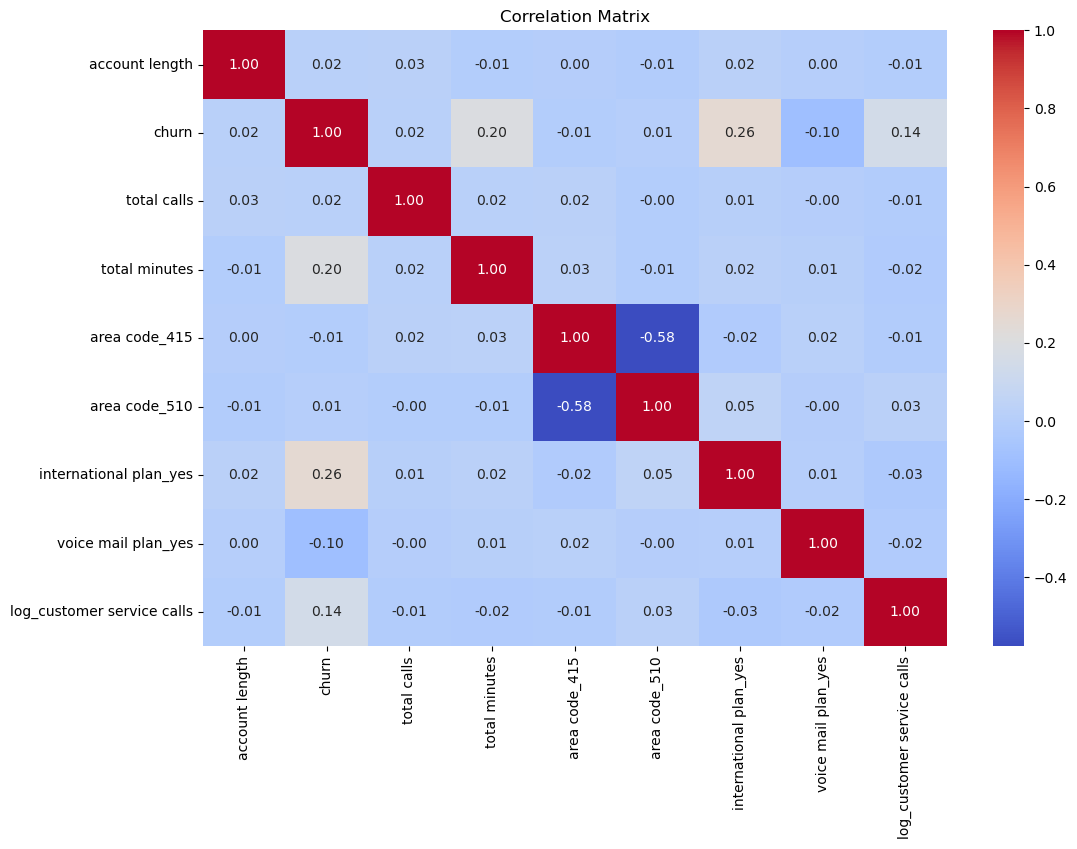

In [42]:
# Correlation heatmap
correlation_matrix = df_log_transformed.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


#### Perform Logistic Regession and Random Forest

In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

#Assuming df_log_transformed is your pre-processed dataset
#Define features and target variable
numerical_columns = [
    'account length', 
    'log_customer service calls', 
    'total calls', 
    'total minutes'
]
X = df_log_transformed[numerical_columns]  # Features
y = df_log_transformed['churn']  # Target variable (churn)

#Split the data into training and test sets
#Apply SMOTE to handle class imbalance in the training set
#Standardize features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


#Create Logistic Regression model
#Predict and evaluate Logistic Regression
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train_scaled, y_train_resampled)

y_pred_log_reg = log_reg.predict(X_test_scaled)
y_prob_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1]


In [44]:
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_log_reg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))

#Create Random Forest model
#Predict and evaluate Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, 
                                       class_weight='balanced', 
                                       random_state=42)
rf_classifier.fit(X_train_scaled, y_train_resampled)

y_pred_rf = rf_classifier.predict(X_test_scaled)
y_prob_rf = rf_classifier.predict_proba(X_test_scaled)[:, 1]

Logistic Regression Results:
Accuracy: 0.659
ROC AUC Score: 0.7367544940473763

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.64      0.76       857
           1       0.26      0.76      0.39       143

    accuracy                           0.66      1000
   macro avg       0.60      0.70      0.58      1000
weighted avg       0.84      0.66      0.71      1000



In [45]:
print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

#Feature Importance for Random Forest
feature_importance = pd.DataFrame({
    'feature': numerical_columns,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)
print("\nRandom Forest Feature Importance:")
print(feature_importance)


Random Forest Results:
Accuracy: 0.873
ROC AUC Score: 0.7994671606106846

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       857
           1       0.56      0.50      0.53       143

    accuracy                           0.87      1000
   macro avg       0.74      0.72      0.73      1000
weighted avg       0.87      0.87      0.87      1000


Random Forest Feature Importance:
                      feature  importance
1  log_customer service calls    0.420427
3               total minutes    0.309546
0              account length    0.135346
2                 total calls    0.134681


In [46]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_log_transformed is your pre-processed dataset
# Define features and target variable
numerical_columns = [
    'account length', 
    'log_customer service calls', 
    'total calls', 
    'total minutes'
]
X = df_log_transformed[numerical_columns]  # Features
y = df_log_transformed['churn']  # Target variable (churn)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to handle class imbalance in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [47]:
#Logistic Regression Hyperparameter Tuning
# Define parameter grid for Logistic Regression
param_grid_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga'],  # Solvers that support different penalties
    'class_weight': [None, 'balanced']  # Class weight handling
}

# Create Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Perform Grid Search with Cross-Validation
grid_search_log_reg = GridSearchCV(
    estimator=log_reg, 
    param_grid=param_grid_log_reg, 
    cv=5,  # 5-fold cross-validation
    scoring='roc_auc',  # Optimizing for ROC AUC
    n_jobs=-1  # Use all available cores
)

# Fit Grid Search
grid_search_log_reg.fit(X_train_scaled, y_train_resampled)

# Best Logistic Regression model
best_log_reg = grid_search_log_reg.best_estimator_

# Predict and evaluate
y_pred_log_reg = best_log_reg.predict(X_test_scaled)
y_prob_log_reg = best_log_reg.predict_proba(X_test_scaled)[:, 1]


Logistic Regression Results:
Best Parameters: {'C': 0.01, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}
Best Cross-Validation Score: 0.6832344428280182

Test Set Metrics:
Accuracy: 0.657
ROC AUC Score: 0.7364403391241198

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.64      0.76       857
           1       0.26      0.76      0.39       143

    accuracy                           0.66      1000
   macro avg       0.60      0.70      0.57      1000
weighted avg       0.84      0.66      0.71      1000



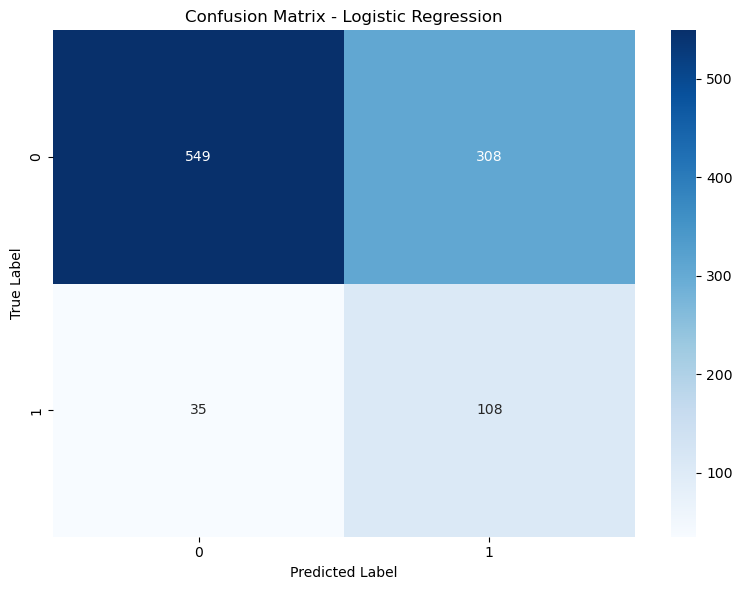

In [48]:
print("Logistic Regression Results:")
print("Best Parameters:", grid_search_log_reg.best_params_)
print("Best Cross-Validation Score:", grid_search_log_reg.best_score_)
print("\nTest Set Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_log_reg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Confusion Matrix for Logistic Regression
plt.figure(figsize=(8,6))
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()


Random Forest Results:
Best Parameters: {'class_weight': None, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score: 0.970615743525007

Test Set Metrics:
Accuracy: 0.873
ROC AUC Score: 0.7994671606106846

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       857
           1       0.56      0.50      0.53       143

    accuracy                           0.87      1000
   macro avg       0.74      0.72      0.73      1000
weighted avg       0.87      0.87      0.87      1000



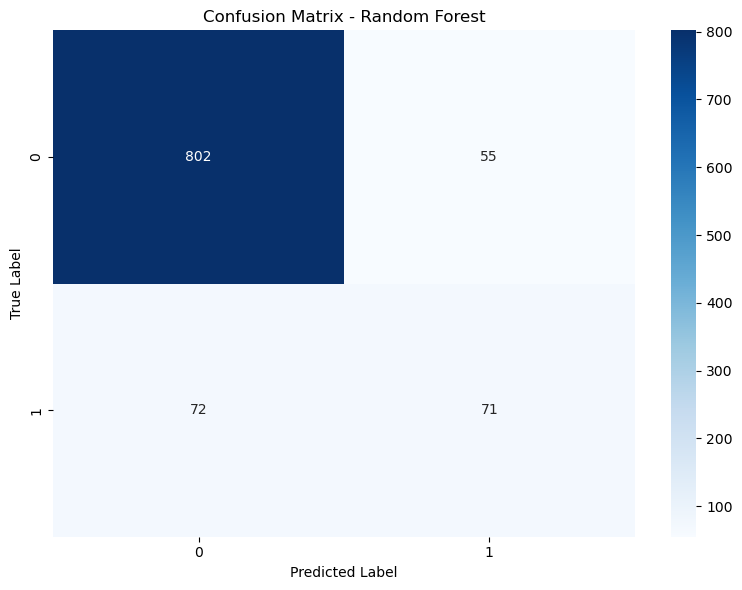


Random Forest Feature Importance:
                      feature  importance
1  log_customer service calls    0.420427
3               total minutes    0.309546
0              account length    0.135346
2                 total calls    0.134681


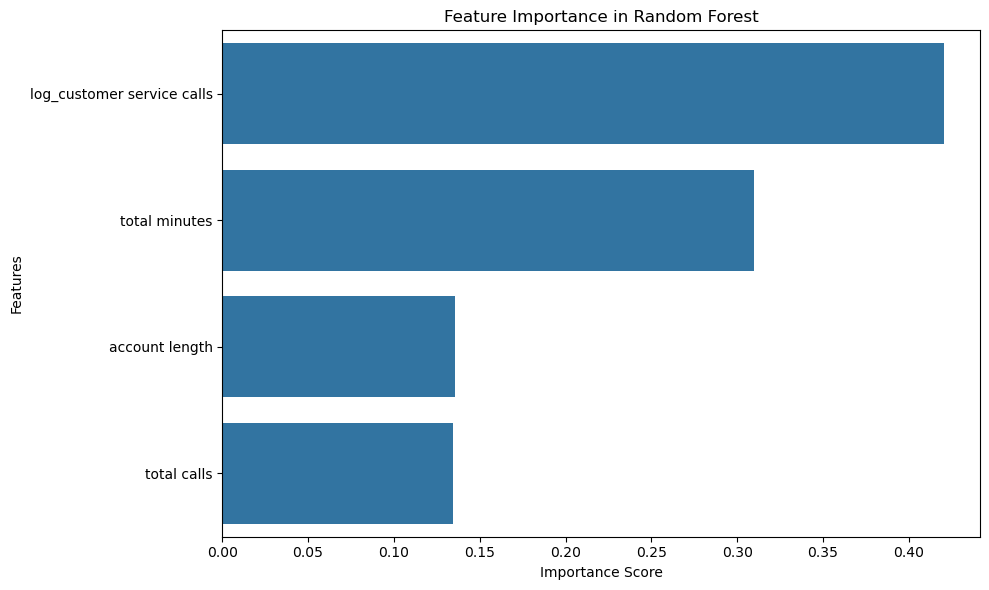

In [54]:
#Random Forest Hyperparameter Tuning
# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
    'class_weight': [None, 'balanced']  # Class weight handling
}

# Create Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search_rf = GridSearchCV(
    estimator=rf_classifier, 
    param_grid=param_grid_rf, 
    cv=5,  # 5-fold cross-validation
    scoring='roc_auc',  # Optimizing for ROC AUC
    n_jobs=-1  # Use all available cores
)

# Fit Grid Search
grid_search_rf.fit(X_train_scaled, y_train_resampled)

# Best Random Forest model
best_rf = grid_search_rf.best_estimator_

# Predict and evaluate
y_pred_rf = best_rf.predict(X_test_scaled)
y_prob_rf = best_rf.predict_proba(X_test_scaled)[:, 1]

print("\nRandom Forest Results:")
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Cross-Validation Score:", grid_search_rf.best_score_)
print("\nTest Set Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
plt.figure(figsize=(8,6))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Feature Importance for Random Forest
feature_importance = pd.DataFrame({
    'feature': numerical_columns,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)
print("\nRandom Forest Feature Importance:")
print(feature_importance)

# Visualize Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [52]:
# Cross-Validation Scores
print("\nCross-Validation Scores:")
cv_scores_log_reg = cross_val_score(best_log_reg, X_train_scaled, y_train_resampled, cv=5, scoring='roc_auc')
cv_scores_rf = cross_val_score(best_rf, X_train_scaled, y_train_resampled, cv=5, scoring='roc_auc')

print("Logistic Regression CV Scores:", cv_scores_log_reg)
print("Logistic Regression Mean CV Score: {:.4f} (+/- {:.4f})".format(cv_scores_log_reg.mean(), cv_scores_log_reg.std() * 2))
print("\nRandom Forest CV Scores:", cv_scores_rf)
print("Random Forest Mean CV Score: {:.4f} (+/- {:.4f})".format(cv_scores_rf.mean(), cv_scores_rf.std() * 2))


Cross-Validation Scores:
Logistic Regression CV Scores: [0.67799511 0.69303913 0.66576617 0.71265475 0.66671704]
Logistic Regression Mean CV Score: 0.6832 (+/- 0.0354)

Random Forest CV Scores: [0.90700121 0.98250022 0.99010718 0.98414063 0.98932948]
Random Forest Mean CV Score: 0.9706 (+/- 0.0639)


### Conclusion

###### In conclusion, the Random Forest model outperformed Logistic Regression in predicting customer churn. The accuracy of the Random Forest on the test data was 87.3%, while Logistic Regression achieved only 65.7%. This highlights the superior predictive capability of Random Forest. 

###### Moreover, the Precision, Recall, and F1 scores were generally higher for Random Forest, particularly when it came to predicting customers who churn. Additionally, Random Forest excelled at distinguishing between customers who churn and those who don’t, as indicated by its higher ROC AUC score of 0.799, compared to the 0.736 score of Logistic Regression. 

###### Within the Random Forest model, the most significant feature for predicting churn was the number of customer service calls, which accounted for 42% importance. This was followed by total minutes, which contributed 31%. Other features, such as account length and total calls, were deemed less important. 

###### Lastly, Random Forest demonstrated a stronger ability to generalize and perform well on new, unseen data, achieving a mean cross-validation score of 97.06%. In contrast, Logistic Regression had a mean cross-validation score of only 68.32%.
###### Another thing to be noted is that the number of outliers were significant and there was a considerable amount of Class imbalance.


#### Recommendation
###### Random Forest is the most effective model for predicting churn, as it performs well with our data. To enhance customer retention, we should focus on key factors such as customer service calls and total minutes used. Reducing the number of service calls could contribute to lowering churn rates. 
###### Although we utilized SMOTE to balance the data, we can further improve churn predictions by adjusting class weights or exploring different models. 
###### For straightforward insights, we can use Logistic Regression. Although it is less accurate, its simplicity makes it easier to interpret, making it suitable for quick and easy results


### Next steps
###### Test other algorithms: Consider testing various machine learning algorithms, such as Gradient Boosting, to determine if they outperform the Random Forest model. 
###### Create New Features:  Develop new features or modify existing ones to extract more information from the data. For example: We can Combine two or more features to create interaction terms that capture the relationships between existing variables. If possible, also incorporate additional customer information, such as demographics e.g. Age to enhance the model.
###### Improve Model Settings: Adjust the settings of different models through hyperparameter tuning to identify the optimal version of each model. Additionally, fine-tune the settings of the Random Forest model to achieve better results.
###### Implement the Best Model: Once we have identified the best-performing model, integrate it into a real business application to automatically predict customer churn.
###### Continuously Enhance the Model: Collect new data over time and regularly retrain the model to ensure its accuracy remains high as customer behavior evolves.
